### Импорт библиотек

In [1]:
# Для загрузки данных с Яндекс.Диска
import requests 
from urllib.parse import urlencode

# Для анализа данных
import pandas as pd
from datetime import timedelta
import numpy as np
from sklearn.cluster import KMeans

# Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Для проверки гипотез о нормальности распределений
import scipy.stats as ss
import pingouin as pg

### Загрузка данных с помощью API

#### Таблица с уникальными идентификаторами пользователей

In [2]:
public_key = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'

# Получаем ссылку
final_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' + urlencode(dict(public_key = public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Загружаем файл в pandas dataframe
download_response = requests.get(download_url)
df_customers = pd.read_csv(download_url)
df_customers.head()

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

#### Таблица заказов

In [3]:
public_key = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'

final_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' + urlencode(dict(public_key = public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
df_orders = pd.read_csv(download_url)
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

#### Товарные позиции, входящие в заказы

In [4]:
public_key = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'

final_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' + urlencode(dict(public_key = public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
df_order_items = pd.read_csv(download_url)
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

### Предварительное исследование данных (EDA)

#### df_customers

In [5]:
print(f'Dataframe shape: \n{df_customers.shape}')
print(f'\nNull values: \n{df_customers.isna().sum()}')
print(f'\nUnique values: \n{df_customers.nunique()}')

Dataframe shape: 
(99441, 5)

Null values: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Unique values: 
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64


#### df_orders

In [6]:
print(f'Dataframe shape: \n{df_orders.shape}')
print(f'\nNull values: \n{df_orders.isna().sum()}')
print(f'\nUnique values: \n{df_orders.nunique()}')

Dataframe shape: 
(99441, 8)

Null values: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Unique values: 
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


In [7]:
# Заказы помимо 'delivered' и 'shipped' невозможно интерпретировать как покупку описанию их статуса в задаче
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
# Количество ордеров со всеми статусами кроме статуса delivered
df_orders.order_status.value_counts()[1:].sum()
# Практически соответствует кол-ву null значений в order_delivered_customer_date

2963

In [9]:
# Проверяем случаи, когда при отсутствии order_delivered_customer_date стоит статус заказа delivered
df_orders \
    .loc[pd.isnull(df_orders['order_delivered_customer_date'])] \
    .query("order_status == 'delivered'")
# Если статус заказа - доставлен, но даты доставки до покупателя нет, данные не стоит интерпретировать как покупку
# Нет оснований предполагать, что это не баг и покупатели на самом деле получили товар

order_id                       customer_id  \
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
20618  f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   
43834  2ebdfc4f15f23b91474edf87475f108e  29f0540231702fda0cfdee0a310f11aa   
79263  e69f75a717d64fc5ecdfae42b2e8e086  cfda40ca8dd0a5d486a9635b611b398a   
82868  0d3268bad9b086af767785e3f0fc0133  4f1d63d35fb7c8999853b2699f5c7649   
92643  2d858f451373b04fb5c984a1cc2defaf  e08caf668d499a6d643dafd7c5cc498a   
97647  ab7c89dc1bf4a1ead9d6ec1ec8968a84  dd1b84a7286eb4524d52af4256c0ba24   
98038  20edc82cf5400ce95e1afacc25798b31  28c37425f1127d887d7337f284080a0f   

      order_status order_purchase_timestamp    order_approved_at  \
3002     delivered      2017-11-28 17:44:07  2017-11-28 17:56:40   
20618    delivered      2018-06-20 06:58:43  2018-06-20 07:19:05   
43834    delivered      2018-07-01 17:05:11  2018-07-01 17:15:12   
79263    delivered      2018-07-01 22:05:55  2018-07-01 22:15:14   
82868    delivered      2018-07-01 21:14:02  2018-07-01 21:29:54   
92643    delivered      2017-05-25 23:22:43  2017-05-25 23:30:16   
97647    delivered      2018-06-08 12:09:39  2018-06-08 12:36:39   
98038    delivered      2018-06-27 16:09:12  2018-06-27 16:29:30   

      order_delivered_carrier_date order_delivered_customer_date  \
3002           2017-11-30 18:12:23                           NaN   
20618          2018-06-25 08:05:00                           NaN   
43834          2018-07-03 13:57:00                           NaN   
79263          2018-07-03 13:57:00                           NaN   
82868          2018-07-03 09:28:00                           NaN   
92643                          NaN                           NaN   
97647          2018-06-12 14:10:00                           NaN   
98038          2018-07-03 19:26:00                           NaN   

      order_estimated_delivery_date  
3002            2017-12-18 00:00:00  
20618           2018-07-16 00:00:00  
43834           2018-07-30 00:00:00  
79263           2018-07-30 00:00:00  
82868           2018-07-24 00:00:00  
92643           2017-06-23 00:00:00  
97647           2018-06-26 00:00:00  
98038           2018-07-19 00:00:00

In [10]:
df_orders \
    .query("order_status == 'shipped'").head()
# Поскольку мы не располагаем данными о предоплате заказов, которые отгружены со склада, не будем считать заказы со статусом shipped за покупку

order_id                       customer_id  \
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
162  36530871a5e80138db53bcfd8a104d90  4dafe3c841d2d6cc8a8b6d25b35704b9   
231  4d630f57194f5aba1a3d12ce23e71cd9  6d491c9fe2f04f6e2af6ec033cd8907c   
299  3b4ad687e7e5190db827e1ae5a8989dd  1a87b8517b7d31373b50396eb15cb445   

    order_status order_purchase_timestamp    order_approved_at  \
44       shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
154      shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
162      shipped      2017-05-09 11:48:37  2017-05-11 11:45:14   
231      shipped      2017-11-17 19:53:21  2017-11-18 19:50:31   
299      shipped      2018-06-28 12:52:15  2018-06-28 13:11:09   

    order_delivered_carrier_date order_delivered_customer_date  \
44           2018-06-05 14:32:00                           NaN   
154          2018-01-11 19:39:23                           NaN   
162          2017-05-11 13:21:47                           NaN   
231          2017-11-22 17:28:34                           NaN   
299          2018-07-04 15:20:00                           NaN   

    order_estimated_delivery_date  
44            2018-06-28 00:00:00  
154           2018-02-07 00:00:00  
162           2017-06-08 00:00:00  
231           2017-12-13 00:00:00  
299           2018-08-03 00:00:00

#### df_order_items

In [11]:
print(f'Dataframe shape: \n{df_order_items.shape}')
print(f'\nNull values: \n{df_order_items.isna().sum()}')

Dataframe shape: 
(112650, 7)

Null values: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [12]:
df_order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

### Итог: В качестве покупки считаем только заказы со статусом delivered при обязательно указанном времени доставки заказа

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [13]:
# Объединим все данные в один датафрейм
full_df = df_orders \
    .merge(df_customers,   on = 'customer_id', how = 'left') \
    .merge(df_order_items, on = 'order_id',    how = 'left')
full_df.shape # Некоторые данные замножились, поскольку для некоторых уникальных заказов из orders есть несколько позиций из order_items

(113425, 18)

In [14]:
# Создадим отдельный датафрейм purchases, где отфильтруем только совершённые покупки по выявленному критерию
purchases_df = full_df \
    .loc[pd.notnull(full_df['order_delivered_customer_date'])] \
    .query("order_status == 'delivered'")
print(f'Убрали {full_df.shape[0] - purchases_df.shape[0]} позиций, не являющихся покупками')

Убрали 3236 позиций, не являющихся покупками


In [15]:
purchases_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_item_id                        product_id  \
0            1.0  87285b34884572647811a353c7ac498a   
1            1.0  595fac2a385ac33a80bd5114aec74eb8   
2            1.0  aa4383b373c6aca5d8797843e5594415   
3            1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
4            1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
2  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   
3  66922902710d126a0e7d26b0e3805106  2017-11-23 19:45:59   45.00   
4  2c9e548be18521d1c43cde1c582c6de8  2018-02-19 20:31:37   19.90   

   freight_value  
0           8.72  
1          22.76  
2          19.22  
3          27.20  
4           8.72

In [16]:
# Исследуем полученный датафрейм с покупками
print(f'Dataframe shape: \n{purchases_df.shape}')
print(f'\nNull values: \n{purchases_df.isna().sum()}') # Есть нулевые значения в approved_at и carrier_date, но товар был доставлен до пользователя в определённую дату, следовательно, покупка совершена
print(f'\nUnique values: \n{purchases_df.nunique()}')

Dataframe shape: 
(110189, 18)

Null values: 
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
dtype: int64

Unique values: 
order_id                         96470
customer_id                      96470
order_status                         1
order_purchase_timestamp         95948
order_approved_at                88267
order_delivered_carrier_date     80106
order_delivered_customer_date    95658
ord

In [17]:
# Используя уникальный идентификатор пользователя, посчитаем количество пользователей, совершивших покупку один раз
single_orders_df = purchases_df \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id': 'count'}) \
    .query('order_id == 1')
single_orders_df

customer_unique_id  order_id
0      0000366f3b9a7992bf8c76cfdf3221e2         1
1      0000b849f77a49e4a4ce2b2a4ca5be3f         1
2      0000f46a3911fa3c0805444483337064         1
3      0000f6ccb0745a6a4b88665a16c9f078         1
4      0004aac84e0df4da2b147fca70cf8255         1
...                                 ...       ...
93344  fffbf87b7a1a6fa8b03f081c5f51a201         1
93346  fffea47cd6d3cc0a88bd621562a9d061         1
93347  ffff371b4d645b6ecea244b27531430a         1
93348  ffff5962728ec6157033ef9805bacc48         1
93349  ffffd2657e2aad2907e67c3e9daecbeb         1

[81740 rows x 2 columns]

In [18]:
num = single_orders_df.shape[0]
per_of_total = round((single_orders_df.shape[0]/purchases_df.shape[0])*100, 1)
print(f'Ответ: {num} покупателей ({per_of_total}% от общего числа покупателей) совершили покупку только один раз')

Ответ: 81740 покупателей (74.2% от общего числа покупателей) совершили покупку только один раз


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [19]:
# Отберём колонки с датами в датафрейме со всеми данными и приведём их в datetime формат
date_columns = full_df.columns[[3, 4, 5, 6, 7, -3]]
full_df[date_columns] = full_df[date_columns].apply(pd.to_datetime, format = '%Y-%m-%d %H:%M:%S')
full_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
dtype: object

In [20]:
# Создадим колонку с месяцем и годом создания заказа, относительно которых будем считать отмены заказа
full_df['purchase_month_year'] = full_df['order_purchase_timestamp'].dt.to_period('M')
full_df['purchase_month_year'].head()

0    2017-10
1    2018-07
2    2018-08
3    2017-11
4    2018-02
Name: purchase_month_year, dtype: period[M]

In [21]:
# Создадим сводную таблицу с недоставленными заказами по статусу и месяцам
order_status_by_month = full_df \
    .groupby(['purchase_month_year', 'order_status'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .pivot(index = 'purchase_month_year', columns = 'order_status', values = 'order_id') \
    .fillna(0) \
    .reset_index() \
    .drop(columns = 'delivered')
order_status_by_month.head()

order_status purchase_month_year  approved  canceled  created  invoiced  \
0                        2016-09       0.0       2.0      0.0       0.0   
1                        2016-10       0.0      26.0      0.0      21.0   
2                        2016-12       0.0       0.0      0.0       0.0   
3                        2017-01       0.0       3.0      0.0      13.0   
4                        2017-02       2.0      17.0      0.0      16.0   

order_status  processing  shipped  unavailable  
0                    0.0      2.0          0.0  
1                    2.0      9.0          8.0  
2                    0.0      0.0          0.0  
3                    9.0     18.0         10.0  
4                   37.0     23.0         45.0

In [22]:
# Изменим названия колонок для детализации причин
order_status_by_month = order_status_by_month.rename(columns = {
    'approved':    'Прекращён после подтверждения заказа',
    'canceled':    'Отменён',
    'created':     'Прекращён после создания заказа',
    'invoiced':    'Прекращён после выставления счёта',
    'processing':  'Не завершён процесс сборки',
    'shipped':     'Отгружен со склада, но не доставлен',
    'unavailable': 'Недоступен'
    })

# Выведем среднее количество заказов в месяц в порядке убывания
average_month_df = order_status_by_month \
    .mean(axis = 0) \
    .to_frame(name = 'mean_orders') \
    .sort_values('mean_orders', ascending = False) \
    .reset_index()

In [23]:
average_month_df

order_status  mean_orders
0   Отгружен со склада, но не доставлен        47.44
1                               Отменён        28.24
2                            Недоступен        24.40
3     Прекращён после выставления счёта        14.44
4            Не завершён процесс сборки        14.28
5       Прекращён после создания заказа         0.20
6  Прекращён после подтверждения заказа         0.12

In [24]:
# Визуализация полученных причин незавершения доставки заказов
fig = px.bar(average_month_df,
             x = 'order_status',
             y = 'mean_orders',
             labels = {'order_status': 'Причина', 'mean_orders': 'Среднее количество заказов в месяц'},
             title = 'Среднее количество недоставленных заказов в месяц по разным причинам')
fig.show()

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [25]:
# Отберём колонки с датами в датафрейме purchases и переведём их в datetime формат
date_columns = purchases_df.columns[[3, 4, 5, 6, 7, -3]]
purchases_df[date_columns] = purchases_df[date_columns].apply(pd.to_datetime, format = '%Y-%m-%d %H:%M:%S')

# Создадим колонку с днём недели совершения покупок
purchases_df['purchase_day'] = purchases_df['order_purchase_timestamp'].dt.day_name()

In [26]:
# Создадим сводную таблицу с информацией по совершённым покупкам товаров в разрезе дней недели
product_purchase_day = purchases_df.groupby(['product_id', 'purchase_day'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .pivot(index = 'purchase_day', columns = 'product_id', values = 'order_id') \
    .fillna(0)
product_purchase_day

product_id    00066f42aeeb9f3007548bb9d3f33c38  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     1.0   
Thursday                                   0.0   
Tuesday                                    0.0   
Wednesday                                  0.0   

product_id    00088930e925c41fd95ebfe695fd2655  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     0.0   
Thursday                                   0.0   
Tuesday                                    1.0   
Wednesday                                  0.0   

product_id    0009406fd7479715e4bef61dd91f2462  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     0.0   
Thursday                                   1.0   
Tuesday                                    0.0   
Wednesday                                  0.0   

product_id    000b8f95fcb9e0096488278317764d19  \
purchase_day                                     
Friday                                     1.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     0.0   
Thursday                                   0.0   
Tuesday                                    0.0   
Wednesday                                  1.0   

product_id    000d9be29b5207b54e86aa1b1ac54872  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     0.0   
Thursday                                   0.0   
Tuesday                                    1.0   
Wednesday                                  0.0   

product_id    0011c512eb256aa0dbbb544d8dffcf6e  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     0.0   
Thursday                                   1.0   
Tuesday                                    0.0   
Wednesday                                  0.0   

product_id    00126f27c813603687e6ce486d909d01  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     2.0   
Thursday                                   0.0   
Tuesday                                    0.0   
Wednesday                                  0.0   

product_id    001795ec6f1b187d37335e1c4704762e  \
purchase_day                                     
Friday                                     0.0   
Monday                                     2.0   
Saturday                                   3.0   
Sunday                                     0.0   
Thursday                                   1.0   
Tuesday                                    2.0   
Wednesday                                  1.0   

product_id    001b237c0e9bb435f2e54071129237e9  \
purchase_day                                     
Friday                                     0.0   
Monday                                     0.0   
Saturday                                   0.0   
Sunday                                     0.0   
Thursday                                   1.0   
Tuesday                                   

In [27]:
# Создадим датафрейм, где для каждого товара укажем день недели с наиболее высоким количеством совершённых покупок
product_by_day_df = product_purchase_day \
    .idxmax() \
    .to_frame(name = 'max_purchases_day') \
    .reset_index()
product_by_day_df.head()

product_id max_purchases_day
0  00066f42aeeb9f3007548bb9d3f33c38            Sunday
1  00088930e925c41fd95ebfe695fd2655           Tuesday
2  0009406fd7479715e4bef61dd91f2462          Thursday
3  000b8f95fcb9e0096488278317764d19            Friday
4  000d9be29b5207b54e86aa1b1ac54872           Tuesday

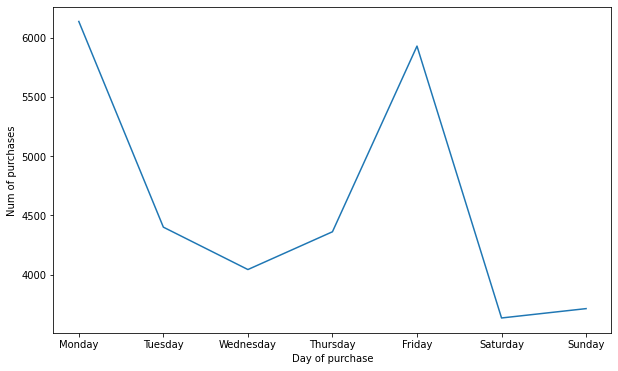

In [28]:
# Аггрегируем и визуализируем полученные данные
custom_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
agg_product_by_day = product_by_day_df.groupby('max_purchases_day', as_index = False) \
    .agg({'product_id': 'count'}) \
    .sort_values('max_purchases_day', key = lambda x: x.map(custom_dict)) \
    .rename(columns = {'max_purchases_day': 'Day of purchase', 'product_id': 'Num of purchases'})

plt.figure(figsize = (10, 6))
sns.lineplot(data = agg_product_by_day, x = 'Day of purchase', y = 'Num of purchases')
plt.show()

### Вывод: Среди всех товаров самые популярные дни совершения покупки - понедельник и пятница, наименее популярный день - суббота

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [29]:
# Добавим колонку с месяцем и годом покупки
purchases_df['purchase_month_year'] = purchases_df['order_purchase_timestamp'].dt.to_period('M')

In [30]:
# Создадим сводную таблицу с количеством покупок на каждого пользователя по месяцам
customer_monthly_purchases = purchases_df \
    .groupby(['customer_unique_id', 'purchase_month_year'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .pivot(index = 'customer_unique_id', columns = 'purchase_month_year', values = 'order_id') \
    .fillna(0) \
    .reset_index()
customer_monthly_purchases.head()

purchase_month_year                customer_unique_id  2016-09  2016-10  \
0                    0000366f3b9a7992bf8c76cfdf3221e2      0.0      0.0   
1                    0000b849f77a49e4a4ce2b2a4ca5be3f      0.0      0.0   
2                    0000f46a3911fa3c0805444483337064      0.0      0.0   
3                    0000f6ccb0745a6a4b88665a16c9f078      0.0      0.0   
4                    0004aac84e0df4da2b147fca70cf8255      0.0      0.0   

purchase_month_year  2016-12  2017-01  2017-02  2017-03  2017-04  2017-05  \
0                        0.0      0.0      0.0      0.0      0.0      0.0   
1                        0.0      0.0      0.0      0.0      0.0      0.0   
2                        0.0      0.0      0.0      1.0      0.0      0.0   
3                        0.0      0.0      0.0      0.0      0.0      0.0   
4                        0.0      0.0      0.0      0.0      0.0      0.0   

purchase_month_year  2017-06  ...  2017-11  2017-12  2018-01  2018-02  \
0                        0.0  ...      0.0      0.0      0.0      0.0   
1                        0.0  ...      0.0      0.0      0.0      0.0   
2                        0.0  ...      0.0      0.0      0.0      0.0   
3                        0.0  ...      0.0      0.0      0.0      0.0   
4                        0.0  ...      1.0      0.0      0.0      0.0   

purchase_month_year  2018-03  2018-04  2018-05  2018-06  2018-07  2018-08  
0                        0.0      0.0      1.0      0.0      0.0      0.0  
1                        0.0      0.0      1.0      0.0      0.0      0.0  
2                        0.0      0.0      0.0      0.0      0.0      0.0  
3                        0.0      0.0      0.0      0.0      0.0      0.0  
4                        0.0      0.0      0.0      0.0      0.0      0.0  

[5 rows x 24 columns]

In [31]:
# Трансформируем сводную таблицу в датафрейм со средним кол-вом покупок в месяц
customer_weekly_purchases_df = customer_monthly_purchases \
    .mean(axis = 0) \
    .to_frame(name = 'mean_monthly_purchases_per_customer') \
    .reset_index()
customer_weekly_purchases_df.head()

purchase_month_year  mean_monthly_purchases_per_customer
0             2016-09                             0.000032
1             2016-10                             0.003353
2             2016-12                             0.000011
3             2017-01                             0.009780
4             2017-02                             0.019904

In [32]:
# Сконвертируем столбец purchase_month_year в формат datetime
customer_weekly_purchases_df['purchase_month_year'] = customer_weekly_purchases_df['purchase_month_year'].astype(str)
customer_weekly_purchases_df['purchase_month_year'] = pd.to_datetime(customer_weekly_purchases_df.purchase_month_year,
                                                                     format = '%Y-%m')

In [33]:
# Посчитаем количество дней в каждом месяце
customer_weekly_purchases_df['days_in_month'] = customer_weekly_purchases_df['purchase_month_year'].dt.days_in_month

# Создадим ещё одну колонку с количеством недель в месяцах
customer_weekly_purchases_df['weeks_in_month'] = customer_weekly_purchases_df['days_in_month'] / 7

# Добавим столбец с посчитанными средними покупками в расчёте на пользователя в неделю
customer_weekly_purchases_df['mean_weekly_purchases_per_customer'] = customer_weekly_purchases_df.mean_monthly_purchases_per_customer / customer_weekly_purchases_df.weeks_in_month

In [34]:
# Уберём ненужные столбцы из таблицы
customer_weekly_purchases_df = customer_weekly_purchases_df \
    .drop(columns = ['mean_monthly_purchases_per_customer', 'days_in_month', 'weeks_in_month'])
customer_weekly_purchases_df.head()

purchase_month_year  mean_weekly_purchases_per_customer
0          2016-09-01                            0.000007
1          2016-10-01                            0.000757
2          2016-12-01                            0.000002
3          2017-01-01                            0.002208
4          2017-02-01                            0.004976

In [35]:
# Визуализируем полученную метрику по месяцам
fig = px.bar(customer_weekly_purchases_df,
             x = 'purchase_month_year',
             y = 'mean_weekly_purchases_per_customer',
             labels = {'purchase_month_year': 'Год и месяц покупки',
                       'mean_weekly_purchases_per_customer': 'Среднее количество покупок за неделю'},
             title = 'Среднее количество покупок за неделю в расчёте на каждого пользователя по году и месяцу покупки')
fig.show()

### Вывод: Пик покупок на пользователя в неделю пришёлся на ноябрь 2017, после чего из фазы бурного роста показатель перешёл в фазу стагнации с незначительными падениями. Сезонных особенностей поведения покупателей определить не удалось.

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

### Параметры когортного анализа:

### 1. Признак формирования когорты - первая покупка
### 2. Размер когорты - временной интервал в месяц
### 3. Отчётный период - с 2017-01 по 2017-12
### 4. Анализируемый ключевой показатель - retention rate

In [36]:
# Рассчитаем месяц первой покупки для каждого покупателя, совершившего покупку в 2017 году
first_purchases = purchases_df \
    .loc[purchases_df.order_purchase_timestamp.dt.year == 2017] \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'purchase_month_year': 'min'}) \
    .rename(columns = {'purchase_month_year': 'first_purchase_month'})
first_purchases.head()

customer_unique_id first_purchase_month
0  0000f46a3911fa3c0805444483337064              2017-03
1  0000f6ccb0745a6a4b88665a16c9f078              2017-10
2  0004aac84e0df4da2b147fca70cf8255              2017-11
3  0005e1862207bf6ccc02e4228effd9a0              2017-03
4  0006fdc98a402fceb4eb0ee528f6a8d4              2017-07

In [37]:
# Добавим дату первой покупки для операций, совершённых в 2017 году, в датафрейм с покупками
purchases_2017_merged = purchases_df \
    .loc[purchases_df.order_purchase_timestamp.dt.year == 2017] \
    .merge(first_purchases, how = 'inner', on = 'customer_unique_id')

# В датафрейме остаются только нужные строки с покупками в 2017 году
purchases_2017_merged.shape

(49554, 21)

In [38]:
# Создадим датафрейм с кол-вом покупок и уникальных пользователей по дате покупки и дате первой покупки
cohorts = purchases_2017_merged \
    .groupby(['first_purchase_month', 'purchase_month_year']) \
    .agg({'order_id': 'count', 'customer_unique_id': pd.Series.nunique})
cohorts

order_id  customer_unique_id
first_purchase_month purchase_month_year                              
2017-01              2017-01                   913                 718
                     2017-02                     2                   2
                     2017-03                     2                   2
                     2017-04                     1                   1
                     2017-05                     3                   3
...                                            ...                 ...
2017-10              2017-11                    39                  31
                     2017-12                    14                  11
2017-11              2017-11                  8322                7060
                     2017-12                    53                  40
2017-12              2017-12                  6044                5338

[77 rows x 2 columns]

In [39]:
# Добавим порядковый номер месяца покупки внутри каждой когорты
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

order_id  customer_unique_id  \
first_purchase_month purchase_month_year                                 
2017-01              2017-01                   913                 718   
                     2017-02                     2                   2   
                     2017-03                     2                   2   
                     2017-04                     1                   1   
                     2017-05                     3                   3   
...                                            ...                 ...   
2017-10              2017-11                    39                  31   
                     2017-12                    14                  11   
2017-11              2017-11                  8322                7060   
                     2017-12                    53                  40   
2017-12              2017-12                  6044                5338   

                                          CohortPeriod  
first_purchase_month purchase_month_year                
2017-01              2017-01                         1  
                     2017-02                         2  
                     2017-03                         3  
                     2017-04                         4  
                     2017-05                         5  
...                                                ...  
2017-10              2017-11                         2  
                     2017-12                         3  
2017-11              2017-11                         1  
                     2017-12                         2  
2017-12              2017-12                         1  

[77 rows x 3 columns]

In [40]:
# Перераспределяем индексы в датафрейме и используем метод unstack, чтобы развернуть когорты по порядковым номерам месяцев
cohorts.reset_index(inplace = True)
cohorts.set_index(['first_purchase_month','CohortPeriod'], inplace = True)

cohorts['customer_unique_id'].unstack(1)

CohortPeriod              1     2     3     4     5     6     7    8    9   \
first_purchase_month                                                         
2017-01                718.0   2.0   2.0   1.0   3.0   1.0   3.0  1.0  1.0   
2017-02               1628.0   3.0   5.0   2.0   7.0   2.0   4.0  3.0  2.0   
2017-03               2503.0  11.0   9.0  10.0   9.0   4.0   4.0  8.0  8.0   
2017-04               2257.0  14.0   5.0   4.0   6.0   6.0   8.0  7.0  7.0   
2017-05               3450.0  16.0  16.0  10.0  10.0  11.0  14.0  5.0  NaN   
2017-06               3037.0  15.0  12.0  13.0   9.0  12.0  11.0  NaN  NaN   
2017-07               3753.0  20.0  13.0   9.0  11.0   8.0   NaN  NaN  NaN   
2017-08               4057.0  28.0  14.0  11.0  14.0   NaN   NaN  NaN  NaN   
2017-09               4005.0  28.0  22.0  11.0   NaN   NaN   NaN  NaN  NaN   
2017-10               4328.0  31.0  11.0   NaN   NaN   NaN   NaN  NaN  NaN   
2017-11               7060.0  40.0   NaN   NaN   NaN   NaN   NaN  NaN  NaN   
2017-12               5338.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN   

CohortPeriod           10   11  
first_purchase_month            
2017-01               3.0  1.0  
2017-02               3.0  2.0  
2017-03               2.0  NaN  
2017-04               NaN  NaN  
2017-05               NaN  NaN  
2017-06               NaN  NaN  
2017-07               NaN  NaN  
2017-08               NaN  NaN  
2017-09               NaN  NaN  
2017-10               NaN  NaN  
2017-11               NaN  NaN  
2017-12               NaN  NaN

In [41]:
# Создаём ряд, содержащий размер каждой когорты
cohort_group_size = cohorts['customer_unique_id'].groupby(level = 0).first()
cohort_group_size.head()

first_purchase_month
2017-01     718
2017-02    1628
2017-03    2503
2017-04    2257
2017-05    3450
Freq: M, Name: customer_unique_id, dtype: int64

In [42]:
# Создаём таблицу с retention по когортам с помощью деления на размер каждой когорты после применения unstack
user_retention = cohorts['customer_unique_id'] \
    .unstack(1) \
    .divide(cohort_group_size, axis = 0)
user_retention

CohortPeriod           1         2         3         4         5         6   \
first_purchase_month                                                          
2017-01               1.0  0.002786  0.002786  0.001393  0.004178  0.001393   
2017-02               1.0  0.001843  0.003071  0.001229  0.004300  0.001229   
2017-03               1.0  0.004395  0.003596  0.003995  0.003596  0.001598   
2017-04               1.0  0.006203  0.002215  0.001772  0.002658  0.002658   
2017-05               1.0  0.004638  0.004638  0.002899  0.002899  0.003188   
2017-06               1.0  0.004939  0.003951  0.004281  0.002963  0.003951   
2017-07               1.0  0.005329  0.003464  0.002398  0.002931  0.002132   
2017-08               1.0  0.006902  0.003451  0.002711  0.003451       NaN   
2017-09               1.0  0.006991  0.005493  0.002747       NaN       NaN   
2017-10               1.0  0.007163  0.002542       NaN       NaN       NaN   
2017-11               1.0  0.005666       NaN       NaN       NaN       NaN   
2017-12               1.0       NaN       NaN       NaN       NaN       NaN   

CohortPeriod                7         8         9         10        11  
first_purchase_month                                                    
2017-01               0.004178  0.001393  0.001393  0.004178  0.001393  
2017-02               0.002457  0.001843  0.001229  0.001843  0.001229  
2017-03               0.001598  0.003196  0.003196  0.000799       NaN  
2017-04               0.003545  0.003101  0.003101       NaN       NaN  
2017-05               0.004058  0.001449       NaN       NaN       NaN  
2017-06               0.003622       NaN       NaN       NaN       NaN  
2017-07                    NaN       NaN       NaN       NaN       NaN  
2017-08                    NaN       NaN       NaN       NaN       NaN  
2017-09                    NaN       NaN       NaN       NaN       NaN  
2017-10                    NaN       NaN       NaN       NaN       NaN  
2017-11                    NaN       NaN       NaN       NaN       NaN  
2017-12                    NaN       NaN       NaN       NaN       NaN

In [43]:
# Визуализируем данные в виде отформатированной таблицы
user_retention \
    .style \
    .background_gradient(cmap = 'plasma') \
    .highlight_null('white') \
    .format("{:.2%}", na_rep = "")

In [44]:
# Определим когорту с самым высоким показателем retention на третий месяц
max_retention_3_month = user_retention.idxmax()[3].strftime("%Y-%m")
print(f'Ответ: За 2017 год среди когорт с временным интервалом в месяц когорта {max_retention_3_month} имела наиболее высокий показатель retention')

Ответ: За 2017 год среди когорт с временным интервалом в месяц когорта 2017-09 имела наиболее высокий показатель retention


## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

### Описание метрик для кластеризации:

### 1. R (Recency)   = Кол-во дней от последней покупки пользователя до следующего дня после последней совершённой покупки
### 2. F (Frequency) = Суммарное количество покупок у пользователя за всё время
### 3. M (Monetary)  = Сумма, потраченная на покупки за всё время (для простоты интерпретации, в $)

## 6.1. Расчёт Recency, Frequency и Monetary

In [45]:
# В датафрейме в несколько строчек записано содержимое каждого заказа. Так, одна из покупок содержит 21 различное наименование
purchases_df.order_id.value_counts().head()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
Name: order_id, dtype: int64

In [46]:
# Время совершеннего заказа совпадает для всех элементов заказа
purchases_df.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'").head()

order_id                       customer_id  \
101222  8272b63d03f5f79c56e9e4120aec44ef  fc3d1daec319d62d49bfb5e1f83123e9   
101223  8272b63d03f5f79c56e9e4120aec44ef  fc3d1daec319d62d49bfb5e1f83123e9   
101224  8272b63d03f5f79c56e9e4120aec44ef  fc3d1daec319d62d49bfb5e1f83123e9   
101225  8272b63d03f5f79c56e9e4120aec44ef  fc3d1daec319d62d49bfb5e1f83123e9   
101226  8272b63d03f5f79c56e9e4120aec44ef  fc3d1daec319d62d49bfb5e1f83123e9   

       order_status order_purchase_timestamp   order_approved_at  \
101222    delivered      2017-07-16 18:19:25 2017-07-17 18:25:23   
101223    delivered      2017-07-16 18:19:25 2017-07-17 18:25:23   
101224    delivered      2017-07-16 18:19:25 2017-07-17 18:25:23   
101225    delivered      2017-07-16 18:19:25 2017-07-17 18:25:23   
101226    delivered      2017-07-16 18:19:25 2017-07-17 18:25:23   

       order_delivered_carrier_date order_delivered_customer_date  \
101222          2017-07-20 15:45:53           2017-07-31 18:03:02   
101223          2017-07-20 15:45:53           2017-07-31 18:03:02   
101224          2017-07-20 15:45:53           2017-07-31 18:03:02   
101225          2017-07-20 15:45:53           2017-07-31 18:03:02   
101226          2017-07-20 15:45:53           2017-07-31 18:03:02   

       order_estimated_delivery_date                customer_unique_id  \
101222                    2017-07-28  4546caea018ad8c692964e3382debd19   
101223                    2017-07-28  4546caea018ad8c692964e3382debd19   
101224                    2017-07-28  4546caea018ad8c692964e3382debd19   
101225                    2017-07-28  4546caea018ad8c692964e3382debd19   
101226                    2017-07-28  4546caea018ad8c692964e3382debd19   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
101222                      5882     sao paulo             SP            1.0   
101223                      5882     sao paulo             SP            2.0   
101224                      5882     sao paulo             SP            3.0   
101225                      5882     sao paulo             SP            4.0   
101226                      5882     sao paulo             SP            5.0   

                              product_id                         seller_id  \
101222  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
101223  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
101224  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
101225  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
101226  05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value purchase_day  \
101222 2017-07-21 18:25:23    1.2           7.89       Sunday   
101223 2017-07-21 18:25:23    1.2           7.89       Sunday   
101224 2017-07-21 18:25:23    1.2           7.89       Sunday   
101225 2017-07-21 18:25:23    1.2           7.89       Sunday   
101226 2017-07-21 18:25:23    1.2           7.89       Sunday   

       purchase_month_year  
101222             2017-07  
101223             2017-07  
101224             2017-07  
101225             2017-07  
101226             2017-07

In [47]:
# Аггрегируем датафрейм по order_id, customer_unique_id и order_purchase_timestamp и получаем общую стоимость каждой покупки
RFM_purchases = purchases_df \
    .groupby(['order_id', 'customer_unique_id', 'order_purchase_timestamp'], as_index = False) \
    .agg({'price': 'sum'})

In [48]:
# Создадим переменную date_now для расчёта параметра Recency, в которую запишем следующей день после последней покупки
datetime_now = purchases_df['order_purchase_timestamp'].max() + timedelta(days = 1)
print(datetime_now)

2018-08-30 15:00:37


In [49]:
# Посчитаем количество дней от покупки до datetime_now
RFM_purchases['days_since_order'] = RFM_purchases.order_purchase_timestamp.apply(lambda x: (datetime_now - x).days)
RFM_purchases.head()

order_id                customer_unique_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  871766c5855e863f6eccc05f988b23cb   
1  00018f77f2f0320c557190d7a144bdd3  eb28e67c4c0b83846050ddfb8a35d051   
2  000229ec398224ef6ca0657da4fc703e  3818d81c6709e39d06b2738a8d3a2474   
3  00024acbcdf0a6daa1e931b038114c75  af861d436cfc08b2c2ddefd0ba074622   
4  00042b26cf59d7ce69dfabb4e55b4fd9  64b576fb70d441e8f1b2d7d446e483c5   

  order_purchase_timestamp   price  days_since_order  
0      2017-09-13 08:59:02   58.90               351  
1      2017-04-26 10:53:06  239.90               491  
2      2018-01-14 14:33:31  199.00               228  
3      2018-08-08 10:00:35   12.99                22  
4      2017-02-04 13:57:51  199.90               572

In [50]:
# Запишем в переменную количество дней от самой первой до самой последней покупки в нашем датафрейме
period = (RFM_purchases.order_purchase_timestamp.max() - RFM_purchases.order_purchase_timestamp.min()).days
print(period)

713


In [51]:
# Рассчитываем параметры Recency, Frequency и Monetary
final_RFM = RFM_purchases \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'days_since_order': 'min',
          'order_purchase_timestamp': lambda x: len([d for d in x if d >= datetime_now - timedelta(days = period)]),
          'price': 'sum'}) \
    .rename(columns = {'days_since_order': 'Recency',
                       'order_purchase_timestamp': 'Frequency',
                       'price': 'Monetary'})
final_RFM = final_RFM[final_RFM.Frequency != 0]
final_RFM.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     18.90
2  0000f46a3911fa3c0805444483337064      537          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      288          1    180.00

## 6.2. Сегментация покупателей

In [52]:
final_RFM.describe()
# Recency и Monetary имеют высокую вариативность, в то время как >75% значений Frequency == 1

Recency     Frequency      Monetary
count  93349.000000  93349.000000  93349.000000
mean     237.944970      1.033423    141.620306
std      152.582794      0.209107    215.703182
min        1.000000      1.000000      0.850000
25%      114.000000      1.000000     47.650000
50%      219.000000      1.000000     89.700000
75%      346.000000      1.000000    154.700000
max      695.000000     15.000000  13440.000000

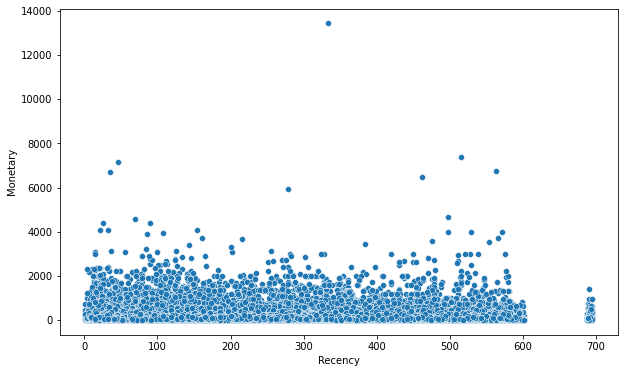

In [53]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = final_RFM, x = 'Recency', y = 'Monetary')
plt.show()

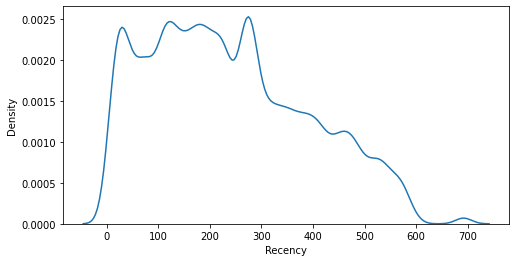

In [54]:
plt.figure(figsize = (8, 4))
sns.kdeplot(final_RFM.Recency)
plt.show()

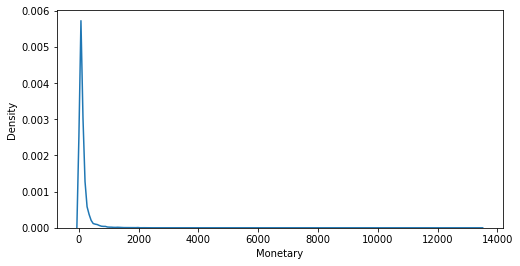

In [55]:
plt.figure(figsize = (8, 4))
sns.kdeplot(final_RFM.Monetary)
plt.show()

### Распределения Recency и Monetary сильно отличаются от нормальных, из скаттерплота никаких выводов о границах сегментов и их кол-ве сделать невозможно. Попробуем привести распределения данных в более нормальный вид и используем метод К-средних для кластеризации покупателей

In [56]:
final_RFM = final_RFM.assign(Recency_log = np.log(final_RFM.Recency),
                             Monetary_log = np.log(final_RFM.Monetary))

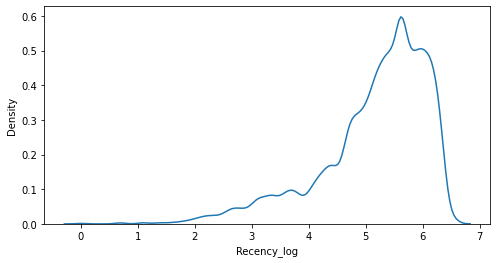

In [57]:
# Лог-распределение Recency имеет сильную левую ассиметрию (left-skewed)
plt.figure(figsize = (8, 4))
sns.kdeplot(final_RFM.Recency_log)
plt.show()

In [58]:
# Робастный метод проверки на нормальность говорит о значимом статистическом расхождении лог-Recency от нормального распределения
ss.normaltest(final_RFM.Recency_log)

NormaltestResult(statistic=19432.96691656927, pvalue=0.0)

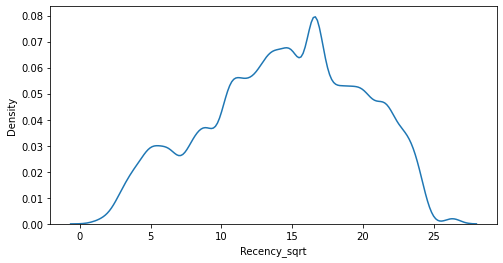

In [59]:
# Применим альтернативный метод нормализации для Recency - возведение значений в квадратный корень
final_RFM['Recency_sqrt'] = final_RFM.Recency ** 0.5
final_RFM = final_RFM.drop(columns = 'Recency_log')

# Визуально кажется, что он сработал намного лучше
plt.figure(figsize = (8, 4))
sns.kdeplot(final_RFM.Recency_sqrt)
plt.show()

In [60]:
# Проверим гипотезу на статтесте
ss.normaltest(final_RFM.Recency_sqrt)
# Распределение всё ещё очень далеко от нормального, но результат значительно лучше, чем при лог-нормализации

NormaltestResult(statistic=6138.579477558545, pvalue=0.0)

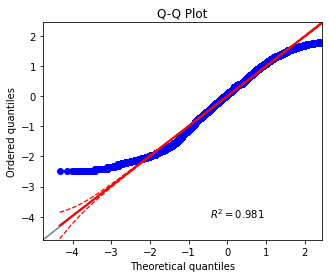

In [61]:
# Хвосты распределения сильно выходят за рамки доверительного интервала, при этом в ближе к центру распределение больше напоминает нормальное
pg.qqplot(final_RFM.Recency_sqrt)
plt.show()
# Попробуем дальше работать с этими значениями

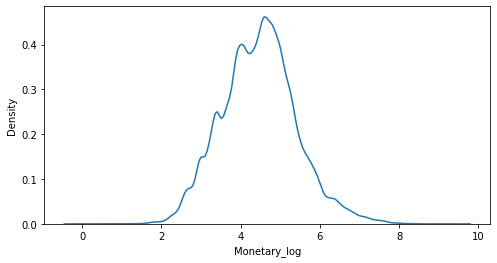

In [62]:
# Распределение логарифмированных данных по Monetary
plt.figure(figsize = (8, 4))
sns.kdeplot(final_RFM.Monetary_log)
plt.show()

In [63]:
# Тоже значимо отличается от нормального
ss.normaltest(final_RFM.Monetary_log)

NormaltestResult(statistic=1132.9942054105995, pvalue=9.406634744943388e-247)

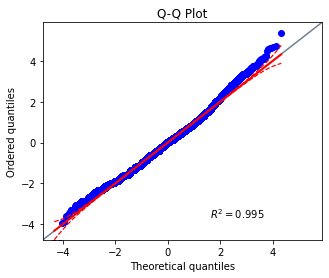

In [64]:
# Визуально результат логнормализации Monetary неплохой, продолжим работать с данными в этом виде
pg.qqplot(final_RFM.Monetary_log)
plt.show()

### Применение метода К-средних для кластеризации покупателей

In [65]:
# Отделим данные для фита в модель
X = final_RFM[['Recency_sqrt', 'Monetary_log']].values

In [66]:
# Найдём сумму квадратов внутри кластеров (WCSS) для различного количества K-средних
WCSS = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

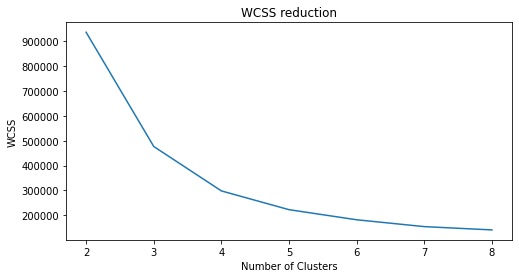

In [67]:
# Рисуем график уменьшения WCSS в зависимости от K
plt.figure(figsize = (8, 4))
plt.plot(range(2, 9), WCSS)
plt.title('WCSS reduction')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Последнее визуально значимое уменьшение WCSS происходит на K=4, выберем его в качестве кол-ва кластеров для сегментации

### Обучаем модель при K=4

In [68]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

Y = kmeans.fit_predict(X)
print(Y)

[1 1 0 ... 0 1 0]


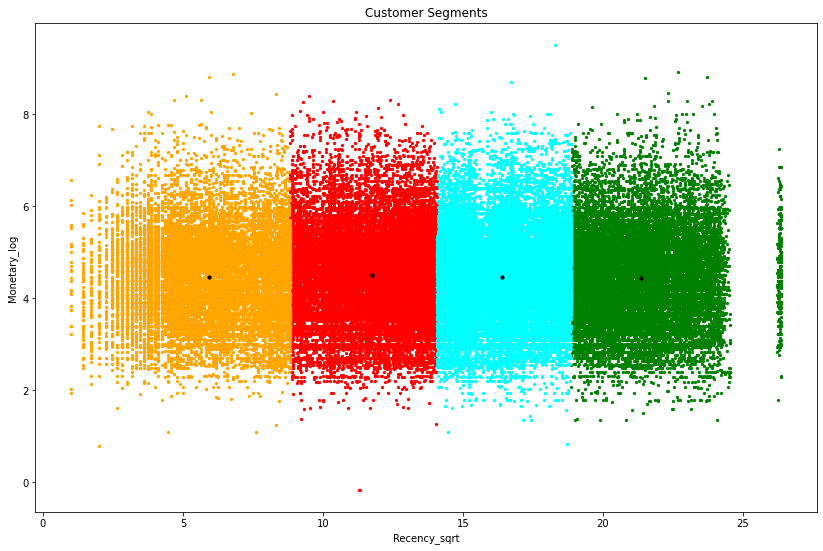

In [69]:
# Визуализируем распределение кластеров
plt.figure(figsize = (14, 9))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 5, c = 'green')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 5, c = 'red')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 5, c = 'orange')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 5, c = 'cyan')

# Также нанесём на скаттерплот центроиды каждого полученного кластера
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10, c = 'black', label = 'Centroids')
plt.title('Customer Segments')
plt.xlabel('Recency_sqrt')
plt.ylabel('Monetary_log')
plt.show()

In [70]:
final_RFM['R_cluster'] = kmeans.labels_

def cluster_shuffle(R):
    if R == 2:
        return 4
    elif R == 1:
        return 3
    elif R == 3:
        return 2
    else:
        return 1

final_RFM['R_cluster'] = final_RFM['R_cluster'].apply(cluster_shuffle)

final_RFM.R_cluster.value_counts()

2    29191
3    26173
1    21939
4    16046
Name: R_cluster, dtype: int64

### Как можно заметить, сегменты были выделены по нормализованному параметру Recency, но никак не учитывают Monetary

In [71]:
# Проведём "прямую" через четыре образовавшихся центроида и поделим распределение Monetary_log пополам
cluster_centers = [i[1] for i in kmeans.cluster_centers_]
cc_mean = np.mean(cluster_centers)
print(cc_mean)

4.466402844395268


In [72]:
def clusterizator(M):
    if M >= cc_mean:
        return 2
    else:
        return 1
    
final_RFM['M_cluster'] = final_RFM['Monetary_log'].apply(clusterizator)

In [73]:
# Данные распределились между сегментами примерно поровну
final_RFM.M_cluster.value_counts()

2    47534
1    45815
Name: M_cluster, dtype: int64

In [74]:
# Более 75% покупателей сделали всего одну покупку, поэтому Frequency поделим всего на два сегмента, объединив пользователей, которые сделали одну и более одной покупки

# Чем выше значение Frequency, тем выше метрика f_score (от 1 до 2), поскольку покупатель делает покупки чаще
def f_score(x):
    if x == 1:
        return 1
    else:
        return 2
    
final_RFM['F_cluster'] = final_RFM['Frequency'].apply(lambda x: f_score(x))

In [75]:
final_RFM.head()

customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    129.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     18.90   
2  0000f46a3911fa3c0805444483337064      537          1     69.00   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     25.99   
4  0004aac84e0df4da2b147fca70cf8255      288          1    180.00   

   Monetary_log  Recency_sqrt  R_cluster  M_cluster  F_cluster  
0      4.866765     10.583005          3          2          1  
1      2.939162     10.723805          3          1          1  
2      4.234107     23.173260          1          1          1  
3      3.257712     17.916473          2          1          1  
4      5.192957     16.970563          2          2          1

In [76]:
final_RFM['RFM'] = final_RFM['R_cluster'].astype(str) + final_RFM['F_cluster'].astype(str) + final_RFM['M_cluster'].astype(str)

In [77]:
final_RFM.RFM.value_counts()

211    14235
212    14082
312    12962
311    12343
111    10873
112    10531
411     7925
412     7597
322      747
222      741
422      448
122      426
221      133
321      121
121      109
421       76
Name: RFM, dtype: int64

### Описания сегментов

In [78]:
def recency_description(R):
    if R == 1:
        return 'Former'
    elif R == 2:
        return 'Not so recent'
    elif R == 3:
        return 'Recent'
    else:
        return 'Newly acquired'
    
def frequency_description(F):
    if F == 1:
        return 'single-purchase'
    else:
        return 'multi-purchase'

def monetary_description(M):
    if M == 1:
        return 'low-value'
    else:
        return 'high-value'

In [79]:
final_RFM['R_desc'] = final_RFM['R_cluster'].apply(recency_description)
final_RFM['F_desc'] = final_RFM['F_cluster'].apply(frequency_description)
final_RFM['M_desc'] = final_RFM['M_cluster'].apply(monetary_description)
final_RFM['RFM Score'] = final_RFM['RFM'].astype(str) + ': ' + final_RFM['R_desc'] + ' ' + final_RFM['F_desc'] + ' ' + final_RFM['M_desc'] + ' customers'

In [80]:
final_RFM = final_RFM.drop(columns = ['Monetary_log', 'Recency_sqrt', 'R_desc', 'F_desc', 'M_desc'])
final_RFM.head()

customer_unique_id  Recency  Frequency  Monetary  R_cluster  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    129.90          3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     18.90          3   
2  0000f46a3911fa3c0805444483337064      537          1     69.00          1   
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     25.99          2   
4  0004aac84e0df4da2b147fca70cf8255      288          1    180.00          2   

   M_cluster  F_cluster  RFM  \
0          2          1  312   
1          1          1  311   
2          1          1  111   
3          1          1  211   
4          2          1  212   

                                           RFM Score  
0   312: Recent single-purchase high-value customers  
1    311: Recent single-purchase low-value customers  
2    111: Former single-purchase low-value customers  
3  211: Not so recent single-purchase low-value c...  
4  212: Not so recent single-purchase high-value ...

### Визуализация сегментов

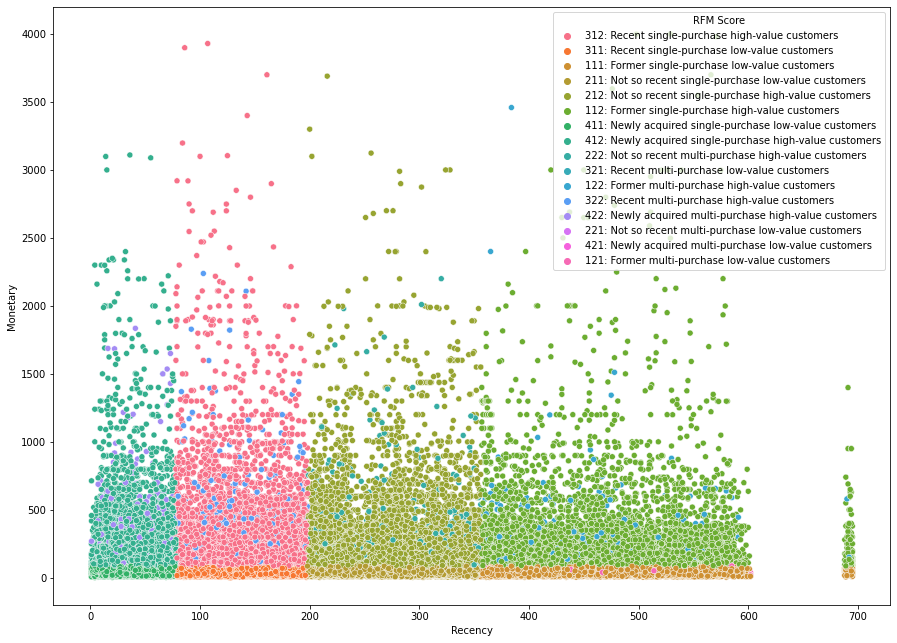

In [81]:
plt.figure(figsize = (15, 11))
sns.scatterplot(data = final_RFM.query("Monetary < 4000"), x = 'Recency', y = 'Monetary', hue = 'RFM Score')
plt.show()

## 6.3 Определение границ сегментов

In [82]:
# Границы сегментов метрики Recency (в днях от "текущего" момента времени)
r_bound = final_RFM \
    .groupby('R_cluster', as_index = False) \
    .agg(r_min = ('Recency', np.min), r_max = ('Recency', np.max))
r_bound['r_interval'] = '[' + r_bound.r_min.astype(str) + '; ' + r_bound.r_max.astype(str) + ']'
r_bound = r_bound.drop(columns = ['r_min', 'r_max'])
r_bound.head()

R_cluster  r_interval
0          1  [356; 695]
1          2  [198; 356]
2          3   [78; 198]
3          4     [1; 78]

In [83]:
# Границы сегментов метрики Frequency (количество покупок за всё время)
f_bound = final_RFM \
    .groupby('F_cluster', as_index = False) \
    .agg(f_min = ('Frequency', np.min), f_max = ('Frequency', np.max))
f_bound['f_interval'] = '[' + f_bound.f_min.astype(str) + '; ' + f_bound.f_max.astype(str) + ']'
f_bound = f_bound.drop(columns = ['f_min', 'f_max'])
f_bound.head()

F_cluster f_interval
0          1     [1; 1]
1          2    [2; 15]

In [84]:
# Границы сегментов метрики Monetary (сумма, потраченная на покупки за всё время)
m_bound = final_RFM \
    .groupby('M_cluster', as_index = False) \
    .agg(m_min = ('Monetary', np.min), m_max = ('Monetary', np.max))
m_bound['m_interval'] = '[' + m_bound.m_min.astype(str) + '; ' + m_bound.m_max.astype(str) + ']'
m_bound = m_bound.drop(columns = ['m_min', 'm_max'])
m_bound.head()

M_cluster        m_interval
0          1      [0.85; 87.0]
1          2  [87.12; 13440.0]

In [85]:
# Для каждого уникального покупателя в таблице final_RFM добавим интервалы метрик, соответствующие его RFM-сегменту
final_RFM = final_RFM \
    .merge(r_bound, on = 'R_cluster') \
    .merge(f_bound, on = 'F_cluster') \
    .merge(m_bound, on = 'M_cluster')

In [86]:
# Теперь, глядя в таблицу final_RFM, мы можем интерпретировать кластер, которому принадлежит каждый покупатель\
final_RFM.head()

customer_unique_id  Recency  Frequency  Monetary  R_cluster  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    129.90          3   
1  0004bd2a26a76fe21f786e4fbd80607f      146          1    154.00          3   
2  00053a61a98854899e70ed204dd4bafe      183          1    382.00          3   
3  0005ef4cd20d2893f0d9fbd94d3c0d97      170          1    104.90          3   
4  0019e8c501c85848ac0966d45226fa1d      121          1    159.99          3   

   M_cluster  F_cluster  RFM  \
0          2          1  312   
1          2          1  312   
2          2          1  312   
3          2          1  312   
4          2          1  312   

                                          RFM Score r_interval f_interval  \
0  312: Recent single-purchase high-value customers  [78; 198]     [1; 1]   
1  312: Recent single-purchase high-value customers  [78; 198]     [1; 1]   
2  312: Recent single-purchase high-value customers  [78; 198]     [1; 1]   
3  312: Recent single-purchase high-value customers  [78; 198]     [1; 1]   
4  312: Recent single-purchase high-value customers  [78; 198]     [1; 1]   

         m_interval  
0  [87.12; 13440.0]  
1  [87.12; 13440.0]  
2  [87.12; 13440.0]  
3  [87.12; 13440.0]  
4  [87.12; 13440.0]

### Например, покупатель с индексом 0 имеет RFM-сегмент 312 с границами метрик Recency от 78 до 198 дней, Frequency в одну покупку за всё время и Monetary от 87 до 13440 долларов, потраченных на покупки за всё время

## 6.4. Выводы и рекомендации

In [87]:
final_RFM['RFM Score'].value_counts()

211: Not so recent single-purchase low-value customers      14235
212: Not so recent single-purchase high-value customers     14082
312: Recent single-purchase high-value customers            12962
311: Recent single-purchase low-value customers             12343
111: Former single-purchase low-value customers             10873
112: Former single-purchase high-value customers            10531
411: Newly acquired single-purchase low-value customers      7925
412: Newly acquired single-purchase high-value customers     7597
322: Recent multi-purchase high-value customers               747
222: Not so recent multi-purchase high-value customers        741
422: Newly acquired multi-purchase high-value customers       448
122: Former multi-purchase high-value customers               426
221: Not so recent multi-purchase low-value customers         133
321: Recent multi-purchase low-value customers                121
121: Former multi-purchase low-value customers                109
421: Newly

### 1. Основная проблема: Покупатели сервиса в абсолютном большинстве отказываются от совершения повторной покупки. Необходимо глубже исследовать причины такого поведения, чтобы повысить удержание покупателей
### 2. Пользователи чаще совершают более мелкие покупки (<100 долларов) на сервисе, что может косвенно влиять на выручку. Здесь задачей будет понимание, является ли это спецификой продающихся товаров, и поиск метода повышения среднего чека покупателей
### 3. Бурный рост сервиса был приостановлен - показатель Recency не показывает роста от более позднего к более ранним кластерам. Помимо удержания, необходимо обратить внимание на привлечение новых пользователей и увеличить конверсию в покупку